# Assignment 1
## Problem 1

/home/kf7mxe/School/2023/Computer Vision/assignment1


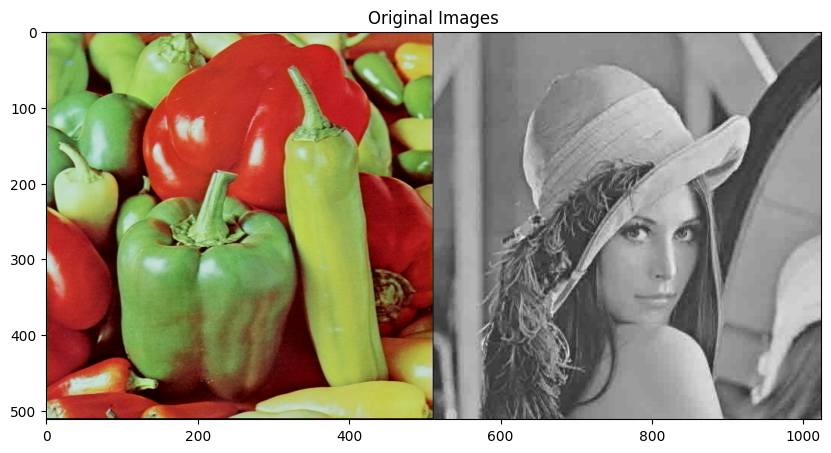

In [87]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

cwd = os.getcwd()
print(cwd)

lenaIm = cv2.imread(cwd+'/Lena.jpg')
pepperIm = cv2.imread(cwd+'/peppers.bmp')

figure = cv2.hconcat([pepperIm, lenaIm])


plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(figure, cv2.COLOR_BGR2RGB))
plt.title('Original Images')
plt.show()



## Problem 2

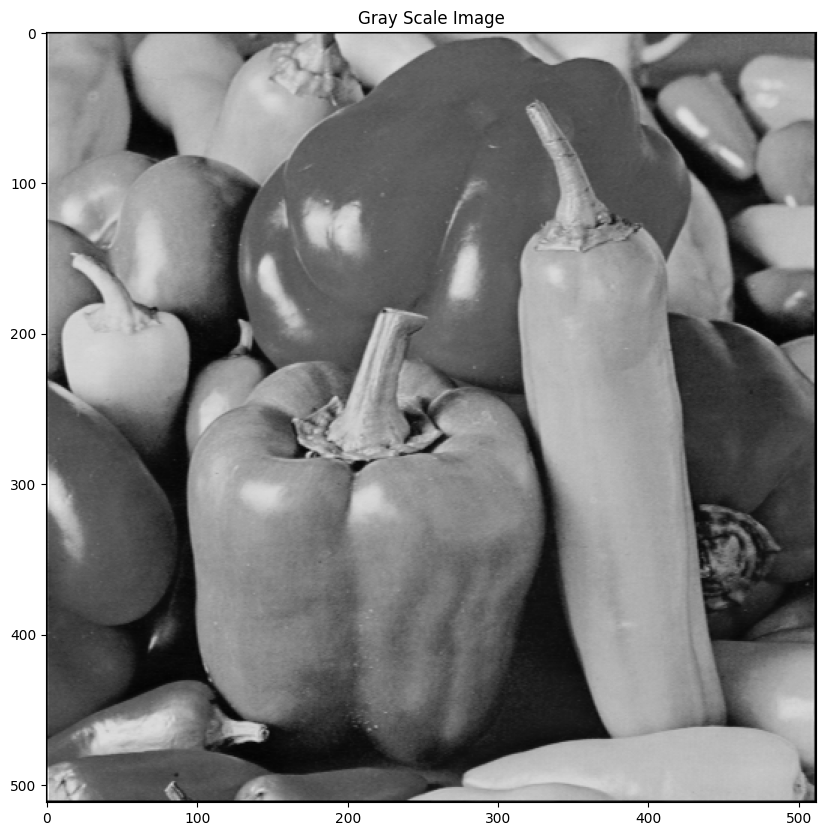

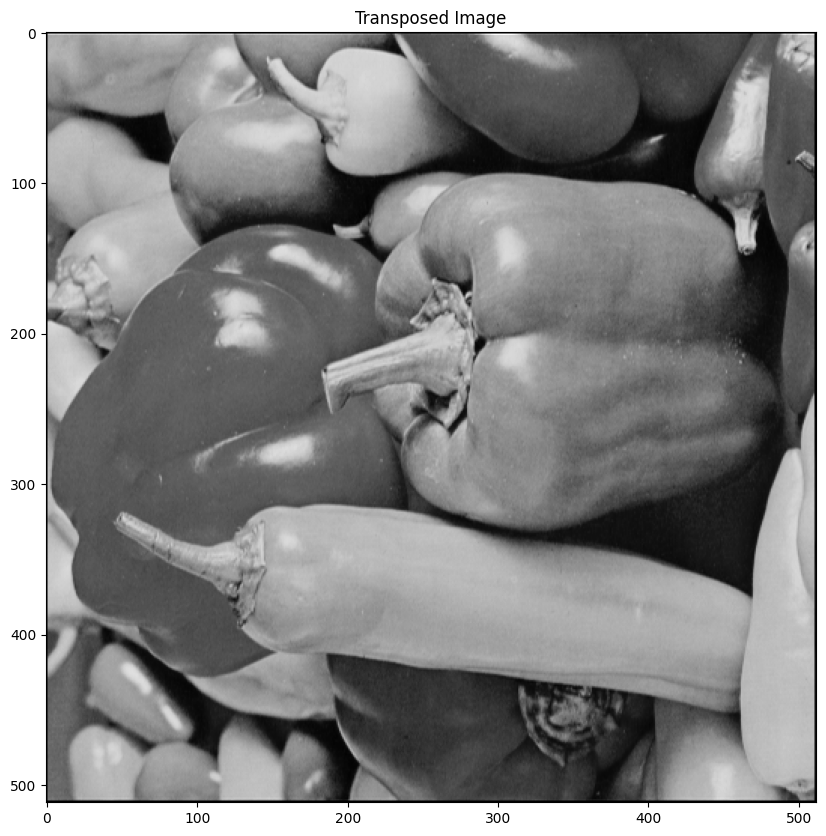

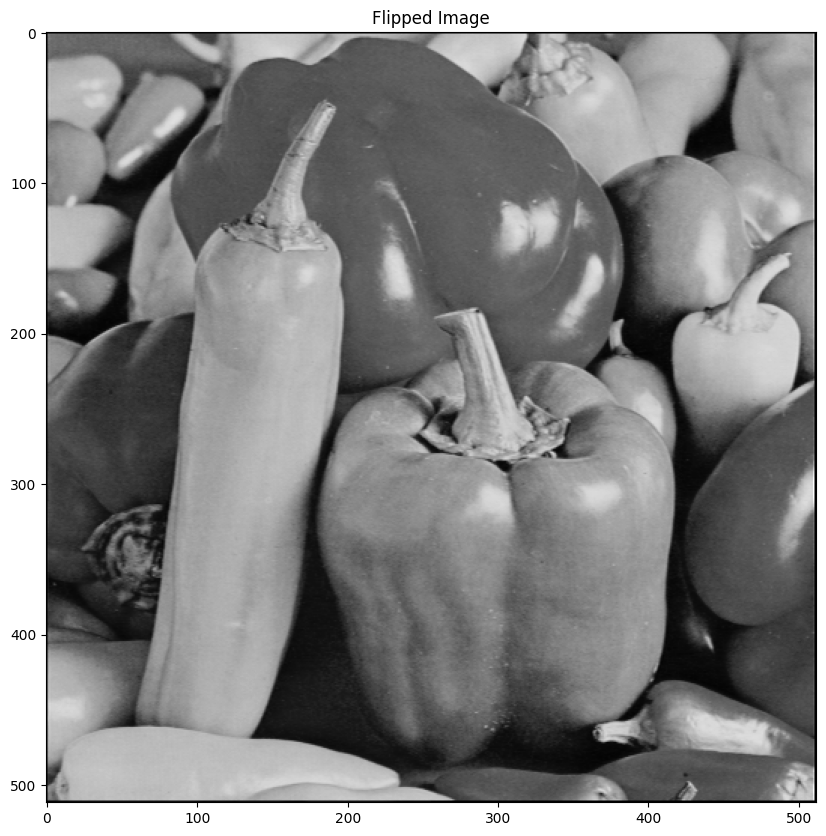

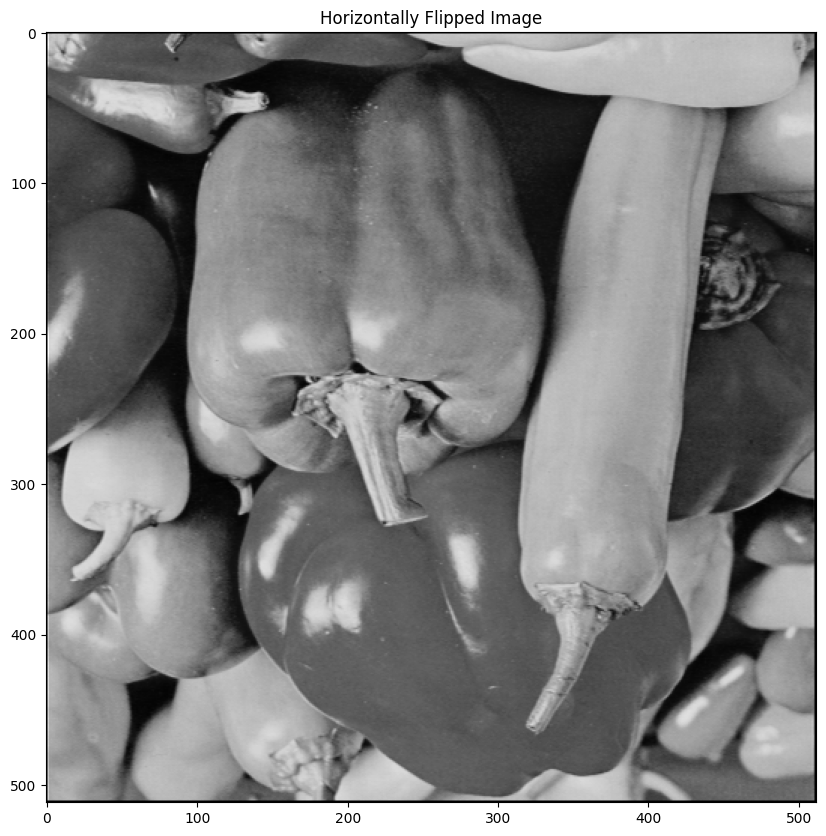

In [88]:
pepper_gray_m = cv2.cvtColor(pepperIm, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(pepper_gray_m, cmap='gray')
plt.title('Gray Scale Image')
plt.show()



pepper_gray_im_t = pepper_gray_m.T

plt.figure(figsize=(10,10))
plt.imshow(pepper_gray_im_t, cmap='gray')
plt.title('Transposed Image')
plt.show()


pepper_gray_im_f = pepper_gray_m[:, ::-1]

plt.figure(figsize=(10,10))
plt.imshow(pepper_gray_im_f, cmap='gray')
plt.title('Flipped Image')
plt.show()

pepperGrayImH = pepper_gray_m[::-1, :]
plt.figure(figsize=(10,10))
plt.imshow(pepperGrayImH, cmap='gray')
plt.title('Horizontally Flipped Image')
plt.show()

# Problem 3

In [89]:
maximum_intensity = lenaIm.max()

minimum_intensity = lenaIm.min()

mean_intensity = lenaIm.mean()

median_intensity = np.median(lenaIm)

def mergeSort(list):
    if len(list) > 1:
        mid = len(list) // 2
        left = list[:mid]
        right = list[mid:]

        mergeSort(left)
        mergeSort(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                list[k] = left[i]
                i += 1
            else:
                list[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            list[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            list[k] = right[j]
            j += 1
            k += 1
    return list

def findInfo():
    print("\n")
    print("No built in functions")
    maximum_intensity, minimum_intensity = computeMaxMinIntensity(lenaIm)
    mean_intensity, median_intensity = meanAndMediumIntensity(lenaIm)

    print("Comparison of built in functions and no built in functions")
    if maximum_intensity == lenaIm.max():
        print("maximum intensity: ", maximum_intensity, " is the same")
    else:
        print("maximum intensity: ", maximum_intensity, " is not the same")
    if minimum_intensity == lenaIm.min():
        print("minimum intensity: ", minimum_intensity, " is the same")
    else:
        print("minimum intensity: ", minimum_intensity, " is not the same")
    if mean_intensity == lenaIm.mean():
        print("mean intensity: ", mean_intensity, " is the same")
    else:
        print("mean intensity: ", mean_intensity, " is not the same")
    if median_intensity == np.median(lenaIm):
        print("median intensity: ", median_intensity, " is the same")
    else:
        print("median intensity: ", median_intensity, " is not the same")


def computeMaxMinIntensity(im):
    maximum_intensity = None
    minimum_intensity = None
    for i in range(len(im)):
        for j in range(len(im[i])):
            for k in range(len(im[i][j])):
                if minimum_intensity == None or im[i][j][k] < minimum_intensity:
                    minimum_intensity = im[i][j][k]
                if maximum_intensity == None or im[i][j][k] > maximum_intensity:
                    maximum_intensity = im[i][j][k]
    return maximum_intensity, minimum_intensity

def meanAndMediumIntensity(im):
    mean_intensity = 0
    for i in range(len(im)):
        for j in range(len(im[i])):
            for k in range(len(im[i][j])):
                mean_intensity += im[i][j][k]
    mean_intensity /= len(lenaIm) * len(im[0]) * len(im[0][0])

    median_intensity = None
    intensity_list = []
    for i in range(len(im)):
        for j in range(len(im[i])):
            for k in range(len(im[i][j])):
                intensity_list.append(im[i][j][k])
    intensity_list = mergeSort(intensity_list)
    median_intensity = intensity_list[len(intensity_list) // 2]
    return mean_intensity, median_intensity




findInfo()






No built in functions
Comparison of built in functions and no built in functions
maximum intensity:  247  is the same
minimum intensity:  22  is the same
mean intensity:  134.59926986694336  is the same
median intensity:  142  is the same


# Problem 4

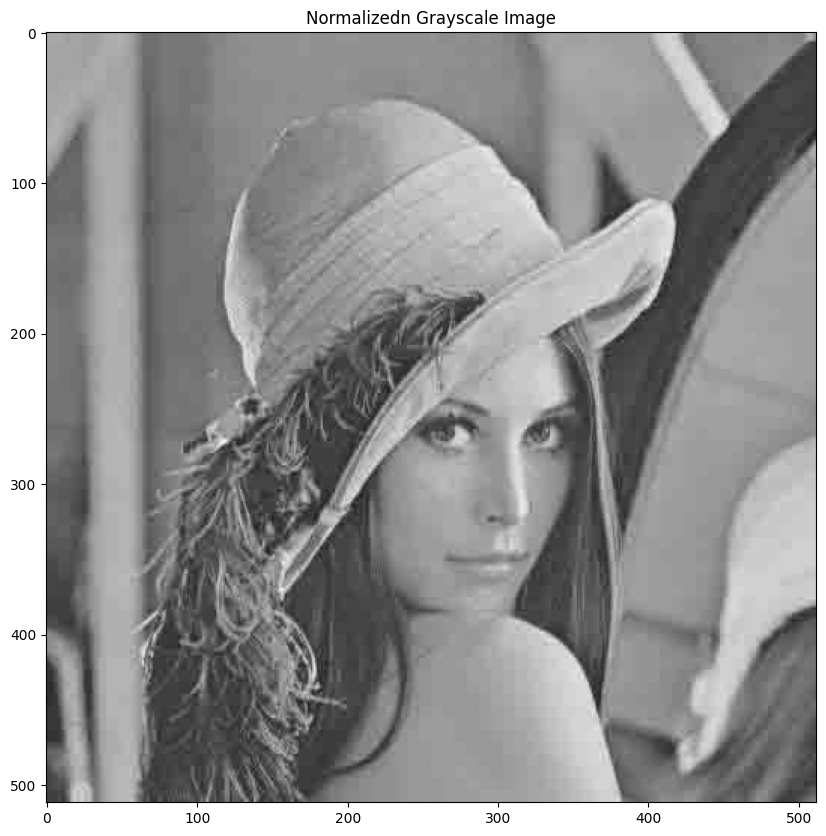

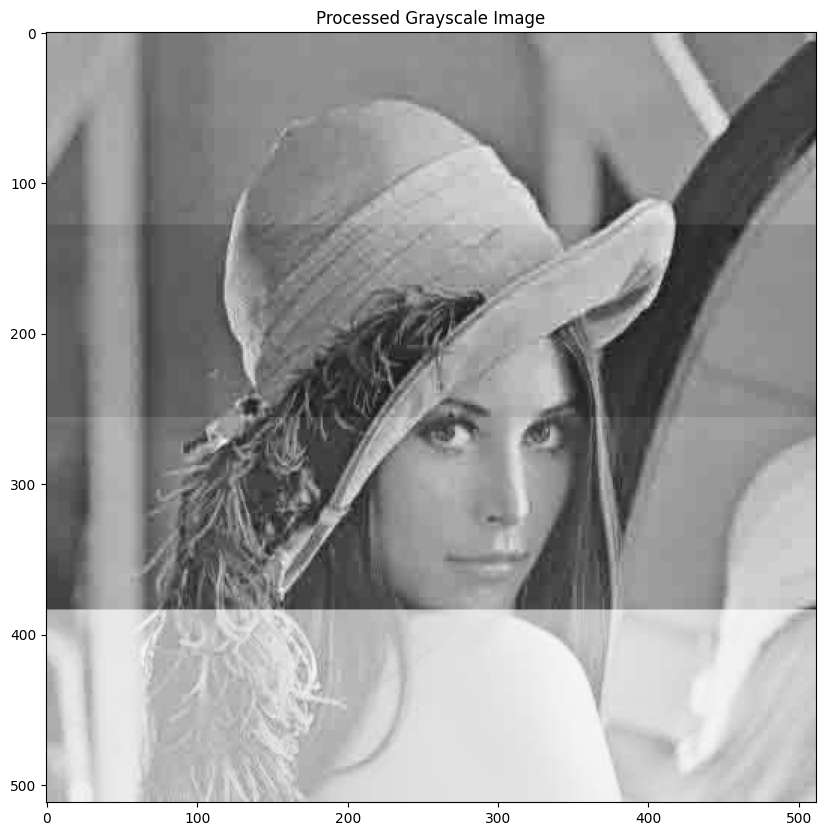

In [90]:
normalizedLenaIm = lenaIm.astype(float)
normalizedLenaIm = normalizedLenaIm / 255

plt.figure(figsize=(10,10))
plt.imshow(normalizedLenaIm)
plt.title('Normalizedn Grayscale Image')
plt.show()

processedNormalizedLenaIm = normalizedLenaIm.copy()
processedNormalizedLenaIm[128:256, :] = processedNormalizedLenaIm[128:256, :] ** 1.25
processedNormalizedLenaIm[384:512, :] = processedNormalizedLenaIm[384:512, :] ** 0.25

plt.figure(figsize=(10,10))
plt.imshow(processedNormalizedLenaIm)
plt.title('Processed Grayscale Image')
plt.show()

cv2.imwrite(cwd+'/Trax_processedNormalizedLenaIm.jpg', processedNormalizedLenaIm * 255)

Trax_processedNormalizedLenaIm = cv2.imread(cwd+'/Trax_processedNormalizedLenaIm.jpg')



# Problem 5


both of my methods worked


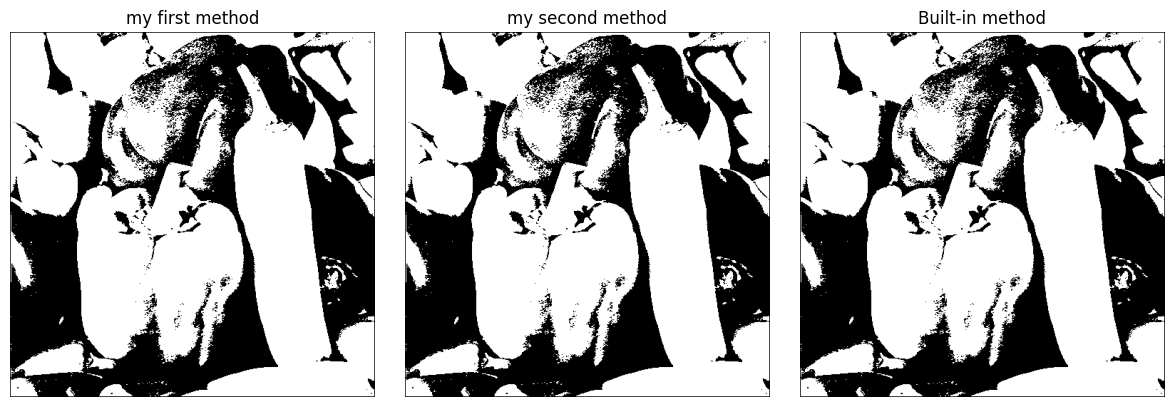

In [91]:
normalizedPepperGrayIm = pepper_gray_m.astype(float)
normalizedPepperGrayIm = normalizedPepperGrayIm / 255

shape = normalizedPepperGrayIm.shape

normalizedPepperGrayImArray = np.array(normalizedPepperGrayIm)
bw1 = (normalizedPepperGrayIm > 0.37)

bw2 = normalizedPepperGrayIm.copy()
bw2[bw2 > 0.37] = 1
bw2[bw2 <= 0.37] = 0


ret, bw3 = cv2.threshold(normalizedPepperGrayIm, 0.37, 1, cv2.THRESH_BINARY)

if np.array_equal(bw1, bw3) and np.array_equal(bw2, bw3):
    print("both of my methods worked")
elif np.array_equal(bw2, bw3) and not np.array_equal(bw1, bw3):
    print("my method 2 worked but not my method 1")
elif np.array_equal(bw1, bw3) and not np.array_equal(bw2, bw3):
    print("my method 1 worked but not my method 2")
else:
    print("my method 2 worked but not my method 1")

plt.figure(figsize=(12, 4))
gs = GridSpec(1,3 )

first_subplot = plt.subplot(gs[0, 0])
first_subplot.imshow(bw1, cmap='gray')
first_subplot.set_title('my first method')
first_subplot.axis('off')

second_subplot = plt.subplot(gs[0, 1])
second_subplot.imshow(bw2, cmap='gray')
second_subplot.set_title('my second method')
second_subplot.axis('off')

third_subplot = plt.subplot(gs[0, 2])
third_subplot.imshow(bw3, cmap='gray')
third_subplot.set_title('Built-in method')
third_subplot.axis('off')

plt.tight_layout()
plt.show()





# Problem 6

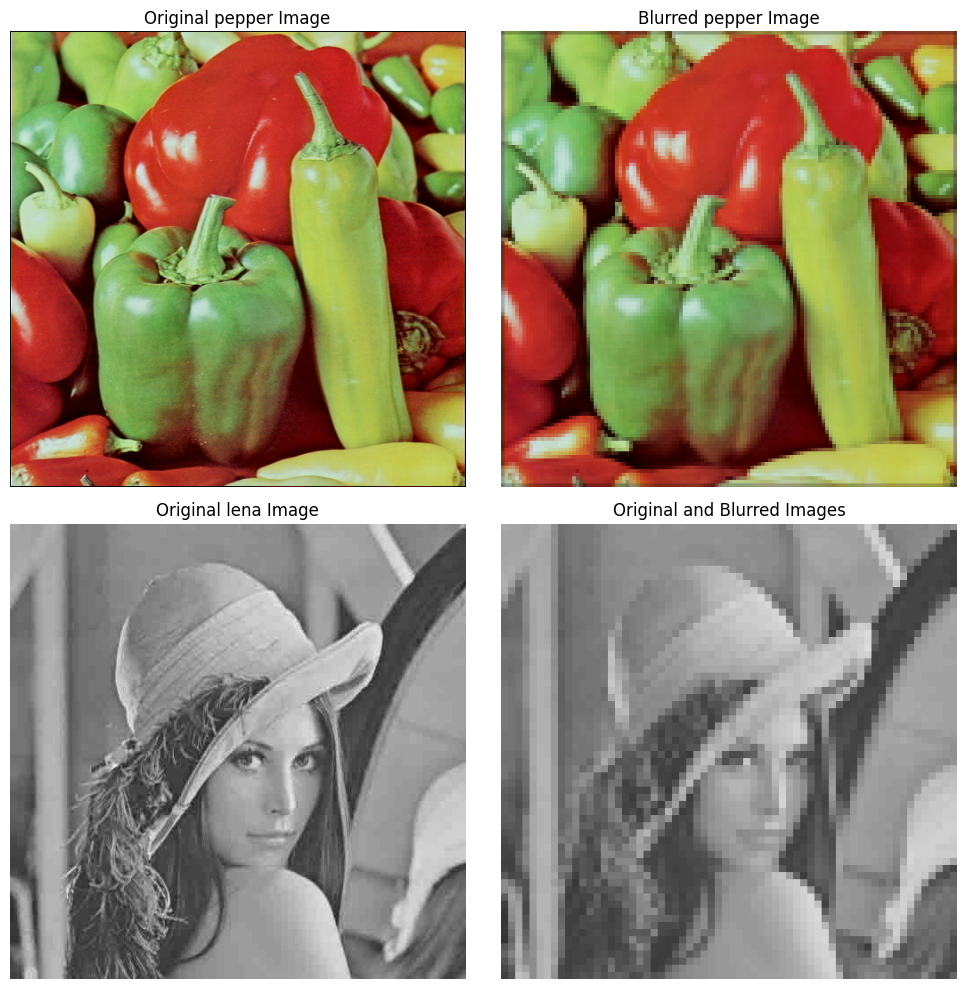

In [92]:
def GenerateBlurImage(im, n):
    blurredIm = im.copy()
    for row in range(0, len(im), n):
        for column in range(0, len(im[row]), n):
            for channel in range(len(im[row][column])):
                average = 0
                for x in range(n):
                    for y in range(n):
                        average += im[row + x][column + y][channel]
                average = average / (n*n)
                for x in range(n):
                    for y in range(n):
                        blurredIm[row + x][column + y][channel] = average
    return blurredIm

blurredLenaIm = GenerateBlurImage(lenaIm, 8)
pepperImBlur = GenerateBlurImage(pepperIm, 4)

figure, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0, 0].imshow(cv2.cvtColor(pepperIm, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original pepper Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(pepperImBlur, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Blurred pepper Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(lenaIm, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original lena Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(blurredLenaIm, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Blurred lena Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.title('Original and Blurred Images')
plt.show()


